# Práctica 3

<ul>
<li>Nikhil Chandru Durgadas Chellaram</li>
<li>Raúl Mateus Sánchez</li>
</ul>

Para comprobar el desarrollo de la práctica: https://github.com/raulmat19/Vision-por-Computador/tree/main/Pr%C3%A1ctica%203

#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import math

Carga imagen y convierte a RGB

(938, 473, 3)


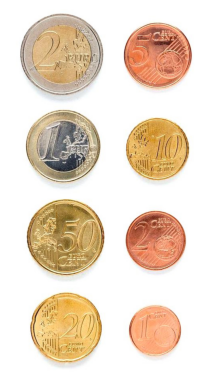

In [2]:
img = cv2.imread('Monedas.jpg') 
print(img.shape)
#OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

Convierte a gris y muestra histograma

(0.0, 256.0)

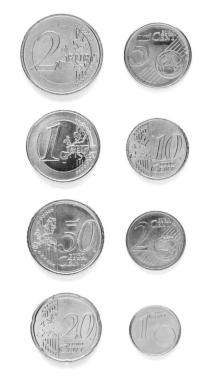

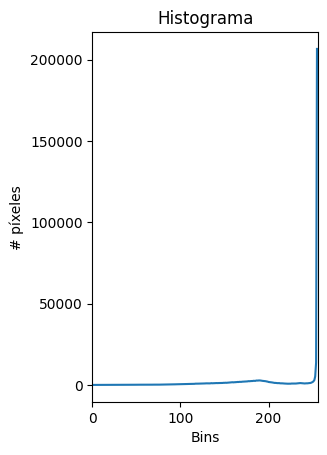

In [3]:
#Convierte a gris y muestra
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Cuenta elementos tras umbralizar

Text(0.5, 1.0, 'OTSU invertida')

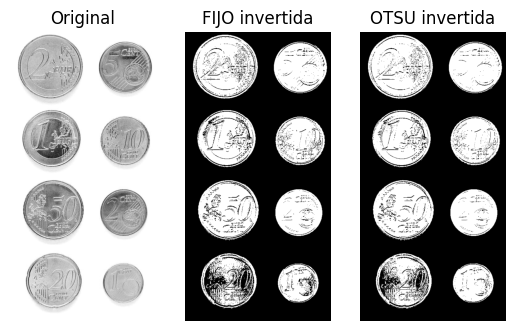

In [4]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 200
#Umbralización binaria invertida, objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')



Búsqueda de componentes y sus contornos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


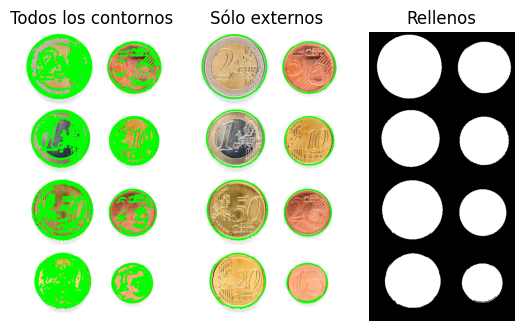

In [5]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits eccepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Sólo contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos en imagen vacía
#Muestra información
#Imagen vacía
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
    #Área
    area = cv2.contourArea(c)
    #Dimensión mínima (útil en ocasiones)
    if area > 10:
        #Perímetro
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            #print(area, perimetro, rect, cx,cy,radio, elipse)
        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')
plt.show()


TAREA 1: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas.

Para esta tarea, se emplean los conocimientos ya adquiridos en este cuaderno. En primer lugar, con el fin de encontrar un buen valor de umbralizado, se calcula el histograma así como se muestra su resultado al aplicar umbralización binaria invertida y OTSU. A continuación, se trata de filtrar aquellos objetos que no sean monedas, aplicando la información encontrada en: https://gis.stackexchange.com/questions/88685/how-to-determine-if-an-object-is-a-circle

In [6]:
def applyThreshold(img_rgb, umbral, option):

    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.show()

    #Convierte a gris
    self_img_gris = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    #Cálculo del histograma de una imagen en escala de grises
    hist = cv2.calcHist([self_img_gris], [0], None, [256], [0, 256])

    # Histograma sin normalizar
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.title("Histograma")
    plt.xlabel("Bins")
    plt.ylabel("# píxeles")
    plt.plot(hist)
    plt.xlim([0, 256])

    if option == 1:
        #Umbralización binaria invertida, objetos en blanco
        res,img_th = cv2.threshold(self_img_gris,umbral,255,cv2.THRESH_BINARY_INV)
      
    else:
        #Otsu
        res,img_th = cv2.threshold(self_img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    plt.figure()
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(self_img_gris,cmap='gray') 
    plt.title('Original')

    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(img_th1,cmap='gray') 
    plt.title('FIJO invertida')

    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(img_th2,cmap='gray') 
    plt.title('OTSU invertida')

    return img_th

In [7]:
def findCircles(img_otsu, self_img_rgb):

    self_img_rgb_copy_1 = self_img_rgb.copy()
    self_img_rgb_copy_2 = self_img_rgb.copy()

    #Sólo contornos externos
    contornos2, hierarchy2 = cv2.findContours(img_otsu, 
        cv2.RETR_EXTERNAL , 
        cv2.CHAIN_APPROX_SIMPLE)

    # Dibuja sobre la imagen de entrada sólo contornos externos
    cv2.drawContours(self_img_rgb_copy_1, contornos2, -1, (0,255,0), 3)
    plt.subplot(132)
    plt.axis("off")
    plt.imshow(self_img_rgb_copy_1) 
    plt.title('Sólo externos')

    coin_count = 0
    for c in contornos2:
        #Área
        area = cv2.contourArea(c)

        if area > 10:
            #Perímetro
            perimetro = cv2.arcLength(c,True)
            if area > 0 and perimetro > 0:
                thinness_ratio = (4*math.pi*area)/(perimetro*perimetro)
                if 0.685 <= thinness_ratio <= 1:
                    #Dibuja los contornos
                    cv2.drawContours(self_img_rgb_copy_2, [c], -1, (0,255,0), 3)
                    coin_count += 1


    plt.subplot(133)
    plt.axis("off")
    plt.imshow(self_img_rgb_copy_2) 
    plt.title('Total de monedas: ' + str(coin_count))
    plt.show()

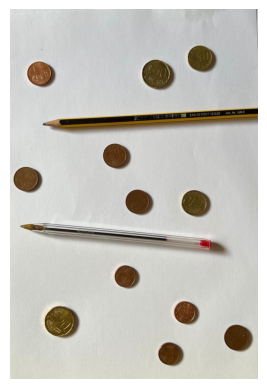

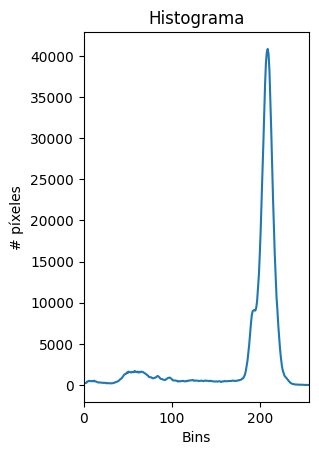

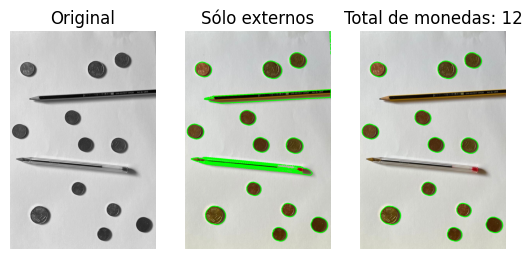

In [8]:
self_img = cv2.imread('prueba_foto2.jpg')

#OpenCV lee las imágenes en BGR, por lo que convertimos para visualizar RGB
self_img_rgb = cv2.cvtColor(self_img, cv2.COLOR_BGR2RGB)
self_img_rgb_copy = self_img_rgb.copy() 

img_thd = applyThreshold(self_img_rgb, 175, 2)
findCircles(img_thd, self_img_rgb_copy)

Una alternativa consiste en contar círculos utilizando la Transformada de Hough. La selección de parámetros puede ser "divertida", más [información](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


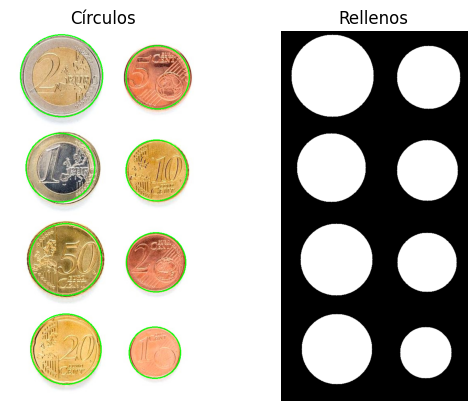

In [9]:
#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

TAREA 2: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen.

Para esta tarea, en primer lugar se crea una función que mediante HoughCircles encuentre los contornos que encajen con círculos (sin ser estos exclusivamente monedas), que no deja de ser una función que emplea lo aprendido en esta práctica aparte de jugar con los parámetros de Hough. Por otra parte, se inicializa tanto la imagen con monedas no solapadas como la imagen con monedas solapadas y se procesan para buscar sus monedas, aunque mejor dicho, círculos.

In [10]:
def get_draw_contours(image):

    gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Suaviza altas frecuencias
    pimg = cv2.medianBlur(gris, 7)

    #Localiza Círculos
    circ = cv2.HoughCircles(
            pimg,  # imagen 
            cv2.HOUGH_GRADIENT,  # tipo de detección
            1,
            100,  # distancia mínima entre círculos
            param1=100, # Valor del gradiente
            param2=35, #Umbral acumulador
            minRadius=10,  # radio mínimo
            maxRadius=100,  # radio máximo
        )


    #Dibuja sobre entrada  e imagen vacía
    img_cont = np.zeros(image.shape)
    for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(image,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 3)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #Muestra resultado
    plt.subplot(121)
    plt.axis("off")
    plt.imshow(image_rgb) 
    plt.title('Círculos')

    plt.subplot(122)
    plt.axis("off")
    plt.imshow(img_cont) 
    plt.title('Rellenos')

    plt.show()

    return image, circ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


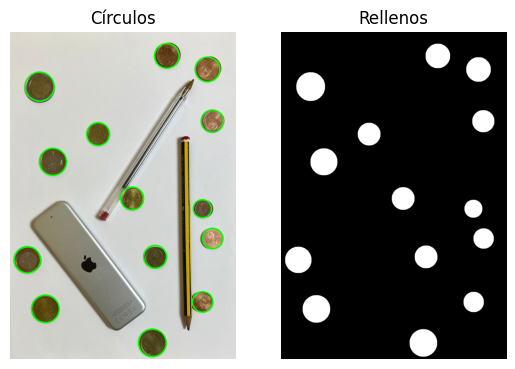

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


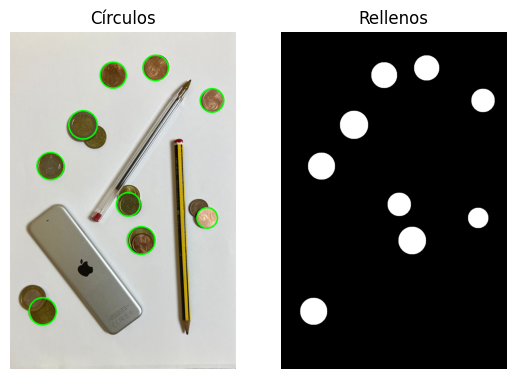

In [11]:
# Reading image
img_no_sol = cv2.imread('foto_monedas.jpeg')
img_sol = cv2.imread('foto_monedas_solapadas.jpeg')

# Get and draw coin contours
img_no_sol, img_circles_no_sol = get_draw_contours(img_no_sol.copy())
img_sol, img_circles_sol = get_draw_contours(img_sol.copy())


img_no_sol_copy = img_no_sol.copy()
img_sol_copy = img_sol.copy()

Otras funciones creadas se corresponden con checkCircles(), la cual, a través de un punto en la imagen, el conjunto de círculos de la imagen y de la propia imagen, trata de determinar si ese punto está dentro de un círculo para saber si, mediante un evento de ratón, estamos pulsando una moneda (recomendable que sea de un euro). Para ello, se ha usado la información del siguiente enlace: https://www.geeksforgeeks.org/find-if-a-point-lies-inside-or-on-circle/


In [12]:
def checkCircles(x, y, circles, img):

    for circle in circles[0]:
        circle_x, circle_y, circle_radio = circle
        if ((x - circle_x)**2) + ((y - circle_y)**2) <= circle_radio**2:
            cv2.circle(img, (int(circle_x), int(circle_y)), int(circle_radio),(0, 0, 255), 3)
            return (img, 1, circle)
    
    return (img, 0, None)

Para tratar de obtener el dinero que hay en la foto procesada tenemos, en este punto, pocos recursos más alla de jugar con las propiedades o características geométricas de las monedas, ya que obviamente con redes neuronales u otras técnicas serán más efectivas. En este caso, se intenta hacer una aproximación con el radio de las monedas. Se interpreta que cuando hacemos click en una moneda, esta es de un euro, por lo que comparando los radios de las monedas con la de la moneda seleccionada mediante una proporción, se intenta encontrar a que valor corresponde el radio de esa moneda.

In [13]:
def getMoney(circles, euro):

    index_of_coin = 0
    money_amount = 0
    coin_detection = []
    euro_size = euro[2]
    
    coins = {0.6993548387:0.01, 0.8064516129:0.02, 0.9139784946:0.05, 0.8494623655:0.10, 0.9569892473:0.20, 1.0430107526:0.50, 1:1.0, 1.1075268817:2.0}

    for circle in circles[0]:
        x, y, radio = circle
        proportion_to_euro = radio/euro_size
        dif = 100     ## Ningún otro valor debería ser más grande que 2
        for prop, value in coins.items():
            close_to_euro = abs(proportion_to_euro - prop)
            if close_to_euro < dif:
                dif = close_to_euro
                index_of_coin = prop
                
        money_amount += coins[index_of_coin]
        coin_detection.append(coins[index_of_coin])
        
    return money_amount, coin_detection
    

Esta función auxiliar trata de obtener el total de dinero en la imagen así como los valores de cada moneda llamando a otras funciones y representar esto en la imagen que se mostrará

In [14]:
def printMoneyValues(res, status, img_circles, euro):

    font = cv2.FONT_HERSHEY_SIMPLEX
    total_money_aux = 0

    if status == 1:
        total_money_aux, coin_detection = getMoney(img_circles, euro)

        i = 0
        for circle in img_circles[0]:
            x, y, r = circle
            if x+10 < res.shape[0]:
                x += 10
            if y-40 > 0:
                y -= 40
            cv2.putText(res, str(coin_detection[i]), (int(x), int(y)), font, 0.7, (255, 0, 251), 2)
            i += 1
    
    return res, total_money_aux

In [15]:
def click_event_no_sol(event, x, y, flags, params):
    
    total_money = 0
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:

        res_no_sol, status, euro = checkCircles(x, y, img_circles_no_sol, img_no_sol_copy.copy())
        res_no_sol, total_money = printMoneyValues(res_no_sol, status, img_circles_no_sol, euro)
        if status == 1:
            print("Dinero total (imagen no solapada): ", total_money)
            print("Dinero real: 5.47€\n")

        cv2.imshow('Imagen no solapada', res_no_sol)

In [16]:
def click_event_sol(event, x, y, flags, params):
    total_money = 0
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:

        res_sol, status, euro = checkCircles(x, y, img_circles_sol, img_sol_copy.copy())
        res_sol, total_money = printMoneyValues(res_sol, status, img_circles_sol, euro)

        if status == 1:
            print("Dinero total (imagen solapada): ", total_money)
            print("Dinero real: 5.47€\n")

        cv2.imshow('Imagen solapada', res_sol)

La ejecución principal consistirá en mostrar dos imágenes, una con monedas solapadas y otra que no, ya procesadas donde se han encontrado sus contornos correspondientes a círculos. A cada una se le asocia una rutina o controlador que registrará eventos de ratón, ya que el objetivo es que el usuario identifique una moneda de 1 euro en la imagen y la seleccione. Una vez seleccionada, el controlador se encargará de comprobar si se ha hecho click en una moneda, y de ser así, se toma de referencia para comprobar las otras monedas respecto a esta, y tratar de determinar su valor para finalmente ofrecer al usuario una estimación (ni mucho menos efectiva) del dinero total en la imagen, mostrándolo en la consola

In [17]:
# displaying the image
cv2.imshow('Imagen no solapada', img_no_sol)
cv2.imshow('Imagen solapada', img_sol)

# setting mouse handler for the image
# and calling the click_event() function
cv2.setMouseCallback('Imagen no solapada', click_event_no_sol)
cv2.setMouseCallback('Imagen solapada', click_event_sol)

# wait for a key to be pressed to exit
while cv2.waitKey(20) != 27:
    continue

# close the window
cv2.destroyAllWindows()

Una de las conclusiones principales es que, el inconveniente más destacado de plantear esta tarea de esta forma es que, aún detectando correctamente las monedas de un euro si hubiese más de una en la imagen, se confunde en un gran porcentaje de veces las monedas de 2 euros con las monedas de 0.50 cent, al tener radios mayores que la moneda de un euro y ser muy parecidos. Por otra parte, con imágenes en las que las monedas aparecen solapadas es muy difícil detectar ambas monedas, e incluso, se detectan dos monedas como una sola.

Microplásticos

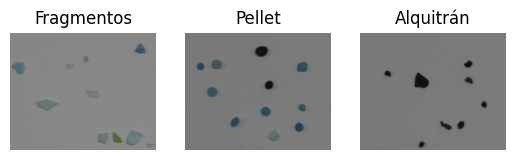

In [18]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán efectivamenet no es microplástico)
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')
plt.show()

TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa con las imágenes completas la matriz de confusión.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxele
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

In [19]:
def getArea(contour):
    return cv2.contourArea(contour)

In [20]:
def getPerimeter(contour):
    return cv2.arcLength(contour, True)

In [21]:
def getCompactness(contour):
    perimeter = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    return (perimeter**2)/area

https://theailearner.com/tag/cv2-minarearect/

In [22]:
def area_bounding_box_ratio(contour):

    area = cv2.contourArea(contour)

    #Mínimo contenedor ajustado para el contorno
    rect = cv2.minAreaRect(contour)
    width, height = rect[1]
    box_area = width*height

    return area/box_area

In [23]:
def ratio_width_height_container(contour):
    container = cv2.minAreaRect(contour)
    width, height = container[1]
    return width/height

In [24]:
def ratio_axis_fitted_ellipse(contour):
    ellipse = cv2.fitEllipse(contour)
    axisA, axisB = ellipse[1]
    return axisA/axisB

https://stackoverflow.com/questions/43517069/find-distance-from-contour-to-a-point-opencv-c

In [25]:
def distance_ratio(contour):

    #Elipse ajustada
    if contour.shape[0] < 5:
        return 0

    min = 0
    max = 0
    flag = 0

    elipse = cv2.fitEllipse(contour)
    cx, cy = elipse[0]

    for i in range(len(contour)):
        x = contour[i][0][0]
        y = contour[i][0][1]
        if flag == 0:
            min = max = math.sqrt(pow((x - cx), 2) + pow((y - cy), 2))
            flag = 1
        else:
            res = math.sqrt(pow((x - cx), 2) + pow((y - cy), 2))
            if res > max:
                max = res
            elif res < min:
                res = min


    return max/min

In [26]:
geometry_functions = [
                    getArea,
                    getPerimeter,
                    getCompactness,
                    area_bounding_box_ratio,
                    ratio_width_height_container,
                    ratio_axis_fitted_ellipse,
                    distance_ratio
                    ]

In [27]:
def get_mean_data(contours):

    mean_data = []
    material_data = []
    contour_data = []
    for contour in contours:
        for function in geometry_functions:
            contour_data.append(function(contour=contour))
        material_data.append(contour_data)
        contour_data = []
    
    sum = 0
    for i in range(len(material_data[0])):
        for j in range(len(material_data)):
            sum += material_data[j][i]
        mean_data.append(sum/len(material_data))
        sum = 0
    
    return mean_data


In [28]:
def printOtsu(image, image_th):
    
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(image, cmap='gray') 
    plt.title('Original')

    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(image_th, cmap='gray') 
    plt.title('OTSU invertida')


In [29]:
def getExternalContours(img_th):
    
    contornos, hierarchy = cv2.findContours(img_th, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

    return contornos, hierarchy

In [30]:
def filterContours(contours):

    contours_filtered = []
    for contorno in contours:
        if cv2.contourArea(contorno) > 750 and cv2.contourArea(contorno) < 30000:
            contours_filtered.append(contorno)

    return contours_filtered

In [31]:
def microplasticClassifier(contours, mean_data):

    frecuency_elements = [0, 0, 0]
    for contour in contours:
        contour_info = []
        for function in geometry_functions:
            contour_info.append(function(contour=contour))

        dif = 0
        flag = 0
        element_clasification = []
        
        for i in range(len(contour_info)):
            index = 0
            for j in range(len(mean_data)):
                close_to = abs(mean_data[j][i] - contour_info[i])
                if flag == 0:
                    dif = close_to
                    flag = 1
                    index = j

                else:
                    if close_to < dif:
                        dif = close_to
                        index = j
                    
            element_clasification.append(index)
            dif = 0
            flag = 0
            
        frecuency_elements[max(set(element_clasification), key = element_clasification.count)] += 1
        element_clasification = []
    
    return frecuency_elements
        


In [32]:
def get_confusion_matrix(values, microplastic_type):

    microplastics = {"Fragmentos": values[0], "Pellets": values[1], "Alquitran": values[2]}

    confusion_matrix = [[0, 0],[0,0]]
    for microplastic, value in microplastics.items():
        if microplastic == microplastic_type:
            confusion_matrix[0][0] = value
        else:
            confusion_matrix[0][1] += value

    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[0])):
            ax.text(x=j, y=i,s=confusion_matrix[i][j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Matriz de confusión: ' + str(microplastic_type), fontsize=18)
    plt.suptitle("Fragmentos: " + str(values[0]) + " | Pellets: " + str(values[1]) + " | Alquitran: " + str(values[2]))
    plt.show()

En esta celda a continuación, se cargará las imágenes de muestra para determinar, para cada imagen (o tipo de material), un vector con la media de las características extraídas para cada uno. En primer lugar, se emplea OTSU para tratar de determinar los contornos externos de las imágenes y se mostrará como ejemplo de lo que vamos a tratar

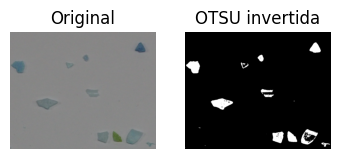

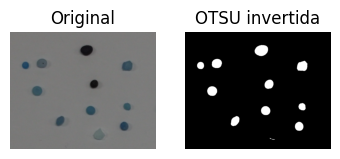

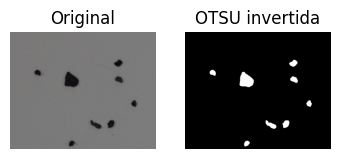

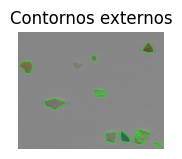

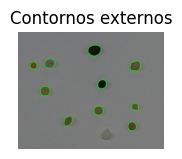

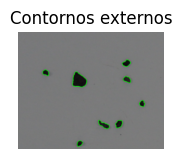

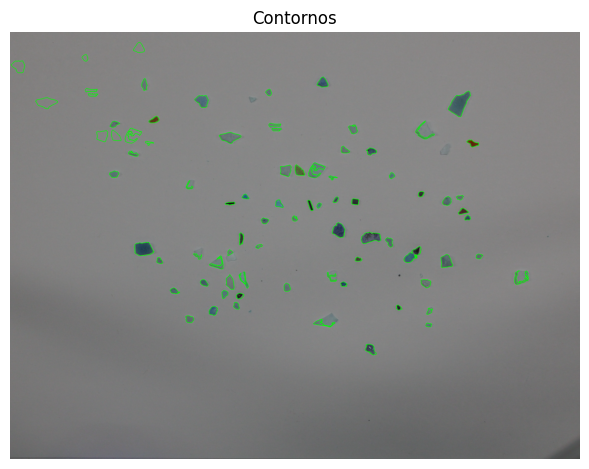

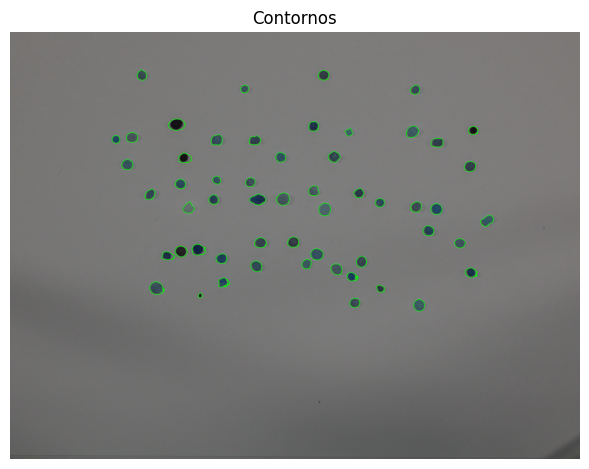

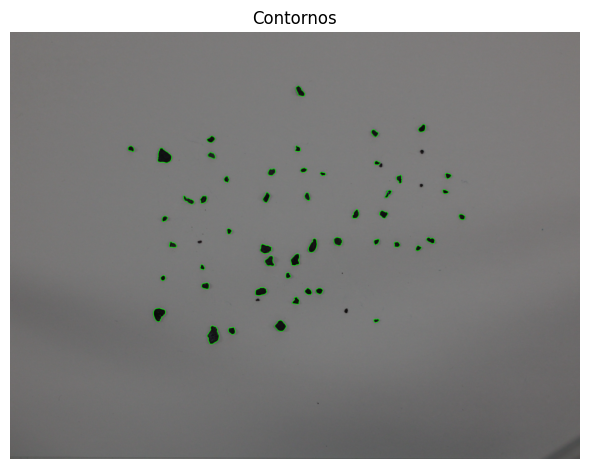

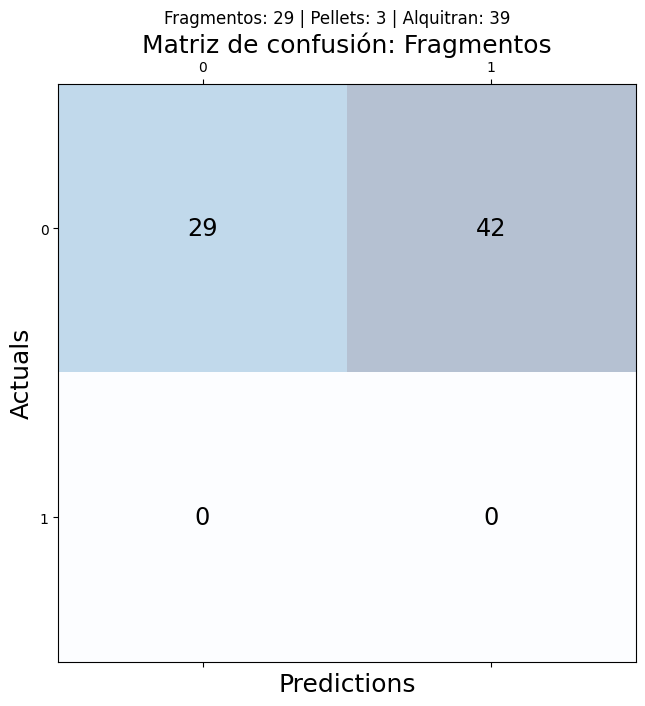

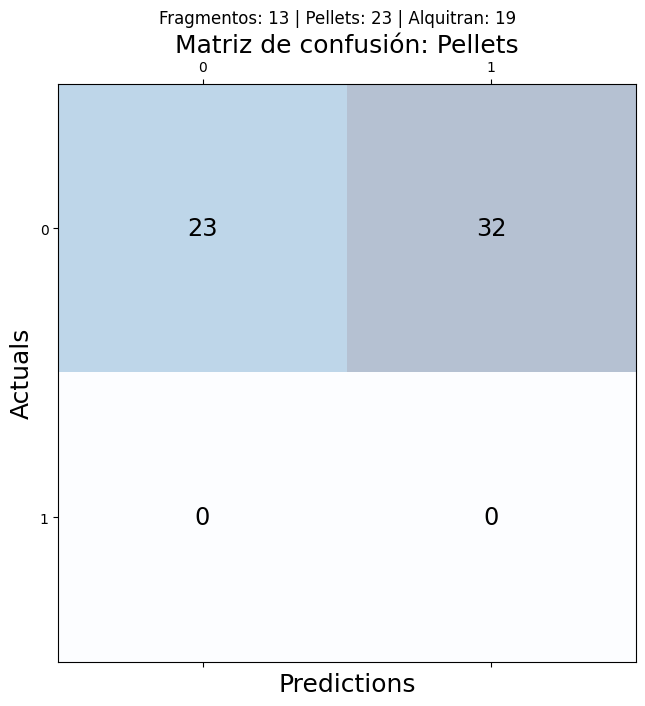

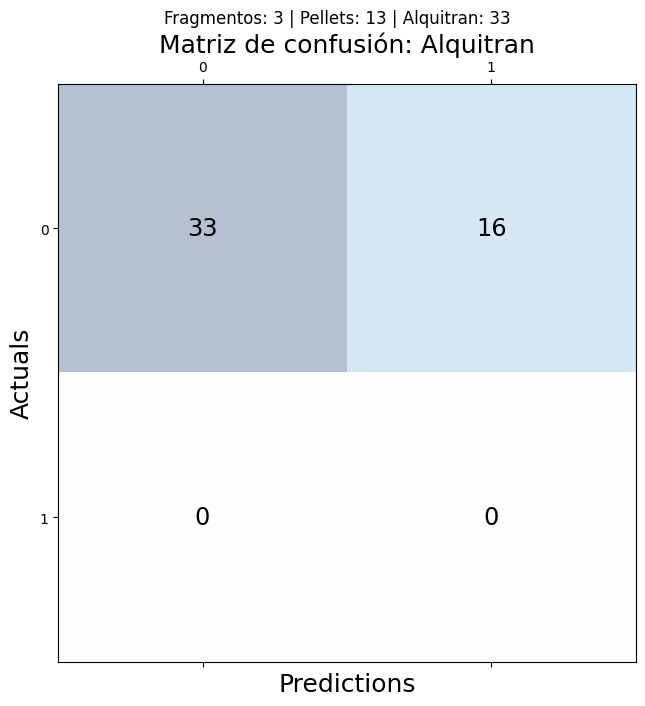

In [37]:
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png')

#Convierte a gris y muestra
imgF_gris = cv2.cvtColor(imgF, cv2.COLOR_BGR2GRAY)
imgP_gris = cv2.cvtColor(imgP, cv2.COLOR_BGR2GRAY)
imgT_gris = cv2.cvtColor(imgT, cv2.COLOR_BGR2GRAY)

# Otsu
retF, img_thF = cv2.threshold(imgF_gris, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
retP, img_thP = cv2.threshold(imgP_gris, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
retT, img_thT = cv2.threshold(imgT_gris, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

images = [imgF, imgP, imgT]
images_gris = [imgF_gris, imgP_gris, imgT_gris]
images_th = [img_thF, img_thP, img_thT]

for i in range(0, 3):
    printOtsu(images[i], images_th[i])
  
contornosF, hierarchyF = getExternalContours(img_thF)
contornosP, hierarchyP = getExternalContours(img_thP)
contornosT, hierarchyT = getExternalContours(img_thT)

imgF_rgb = cv2.cvtColor(imgF, cv2.COLOR_BGR2RGB)
imgP_rgb = cv2.cvtColor(imgP, cv2.COLOR_BGR2RGB)
imgT_rgb = cv2.cvtColor(imgT, cv2.COLOR_BGR2RGB)

# Se filtran contornos despreciables

contornosF = filterContours(contornosF)
contornosP = filterContours(contornosP)
contornosT = filterContours(contornosT)

contornos = [contornosF, contornosP, contornosT]
images_rgb = [imgF_rgb, imgP_rgb, imgT_rgb]

for i in range(0, 3):
    cv2.drawContours(images_rgb[i], contornos[i], -1, (0,255,0), 3)

    plt.figure()
    plt.subplot(131)
    plt.axis("off")
    plt.imshow(images_rgb[i]) 
    plt.title('Contornos externos')


# Se calcula el vector de la media de cada característica por tipo de material
mean_data = []
for contours in contornos:
    mean_data.append(get_mean_data(contours))

# Se debe evaluar las imágenes completas, comparando las propiedades geométricas de los contornos de estas
# con los que hemos obtenido

imgF_completa = cv2.imread('fragment-03-olympus-10-01-2020.JPG') 
imgP_completa = cv2.imread('pellet-03-olympus-10-01-2020.JPG') 
imgT_completa = cv2.imread('tar-03-olympus-10-01-2020.JPG')

#Convierte a gris y muestra
imgF_gris_completa = cv2.cvtColor(imgF_completa, cv2.COLOR_BGR2GRAY)
imgP_gris_completa = cv2.cvtColor(imgP_completa, cv2.COLOR_BGR2GRAY)
imgT_gris_completa = cv2.cvtColor(imgT_completa, cv2.COLOR_BGR2GRAY)

# Otsu
retF_completa, img_thF_completa = cv2.threshold(imgF_gris_completa, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
retP_completa, img_thP_completa = cv2.threshold(imgP_gris_completa, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
retT_completa, img_thT_completa = cv2.threshold(imgT_gris_completa, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

contornosF_completa, hierarchyF_completa = getExternalContours(img_thF_completa)
contornosP_completa, hierarchyP_completa = getExternalContours(img_thP_completa)
contornosT_completa, hierarchyT_completa = getExternalContours(img_thT_completa)

imgF_rgb_completa = cv2.cvtColor(imgF_completa, cv2.COLOR_BGR2RGB)
imgP_rgb_completa = cv2.cvtColor(imgP_completa, cv2.COLOR_BGR2RGB)
imgT_rgb_completa = cv2.cvtColor(imgT_completa, cv2.COLOR_BGR2RGB)

contornosF_completa = filterContours(contornosF_completa)
contornosP_completa = filterContours(contornosP_completa)
contornosT_completa = filterContours(contornosT_completa)

fragmentos = cv2.drawContours(imgF_completa, contornosF_completa, -1, (0,255,0), 3)
pellets = cv2.drawContours(imgP_completa, contornosP_completa, -1, (0,255,0), 3)
imgT_completa_contornos = cv2.drawContours(imgT_completa, contornosT_completa, -1, (0,255,0), 3)

images_contornos = [imgF_completa_contornos, imgP_completa_contornos, imgT_completa_contornos]

for i in range(0, 3):
    plt.figure(figsize=(25,25))
    plt.subplot(131)
    plt.axis("off")
    plt.imshow(images_contornos[i]) 
    plt.title('Contornos')

frecuencia_contornosF = microplasticClassifier(contornosF_completa, mean_data)
frecuencia_contornosP = microplasticClassifier(contornosP_completa, mean_data)
frecuencia_contornosT = microplasticClassifier(contornosT_completa, mean_data)


get_confusion_matrix(frecuencia_contornosF, "Fragmentos")
get_confusion_matrix(frecuencia_contornosP, "Pellets")
get_confusion_matrix(frecuencia_contornosT, "Alquitran")


A continuación, se crearán tres arrays, que contendrán la media de cada característica, arrays que corresponderan a cada material. GetCompacness da error pq se divide entre 0